In [17]:
pip install imbalanced-learn

In [18]:
pip install catboost

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from collections import Counter
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [4]:
# Membaca data
df = pd.read_csv(r"D:\Prediksi Status Gizi\Notebook Pengerjaan\dataset status gizi balita.csv")
df.head()

,Jenis_Kelamin,Usia,Berat_Badan_Lahir,Tinggi_Badan_Lahir,Berat_Badan,Tinggi_Badan,Status_Pemberian_ASI,Status_Tinggi_Badan,Status_Berat_Badan,Status_Gizi
0,Laki-laki,35,2.8,49,10.5,72.2,Tidak,Sangat pendek,Berat badan kurang,Berisiko gizi lebih
1,Laki-laki,44,3.0,49,7.1,72.2,Tidak,Sangat pendek,Berat badan sangat kurang,Gizi kurang
2,Perempuan,47,2.8,49,7.0,92.7,Tidak,Pendek,Berat badan sangat kurang,Gizi buruk
3,Perempuan,41,3.0,49,7.1,73.5,Tidak,Sangat pendek,Berat badan sangat kurang,Gizi kurang
4,Perempuan,42,2.8,49,10.0,65.0,Tidak,Sangat pendek,Berat badan kurang,Obesitas


In [5]:
data = df.copy()
data.head()

,Jenis_Kelamin,Usia,Berat_Badan_Lahir,Tinggi_Badan_Lahir,Berat_Badan,Tinggi_Badan,Status_Pemberian_ASI,Status_Tinggi_Badan,Status_Berat_Badan,Status_Gizi
0,Laki-laki,35,2.8,49,10.5,72.2,Tidak,Sangat pendek,Berat badan kurang,Berisiko gizi lebih
1,Laki-laki,44,3.0,49,7.1,72.2,Tidak,Sangat pendek,Berat badan sangat kurang,Gizi kurang
2,Perempuan,47,2.8,49,7.0,92.7,Tidak,Pendek,Berat badan sangat kurang,Gizi buruk
3,Perempuan,41,3.0,49,7.1,73.5,Tidak,Sangat pendek,Berat badan sangat kurang,Gizi kurang
4,Perempuan,42,2.8,49,10.0,65.0,Tidak,Sangat pendek,Berat badan kurang,Obesitas


In [6]:
# Mengubah data kategorikal ke numerik menggunakan Label Encoding
encoders = {}
for col in ["Jenis_Kelamin", "Status_Pemberian_ASI", "Status_Berat_Badan", "Status_Tinggi_Badan", "Status_Gizi"]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le
for col_name, encoder in encoders.items():
    class_mapping = {idx: label for idx, label in enumerate(encoder.classes_)}
    print(f"Kolom '{col_name}':")
    print(class_mapping)
    print("-" * 50)

Kolom 'Jenis_Kelamin':
{0: 'Laki-laki', 1: 'Perempuan'}
--------------------------------------------------
Kolom 'Status_Pemberian_ASI':
{0: 'Tidak', 1: 'Ya'}
--------------------------------------------------
Kolom 'Status_Berat_Badan':
{0: 'Berat badan kurang', 1: 'Berat badan normal', 2: 'Berat badan sangat kurang', 3: 'Risiko berat badan lebih'}
--------------------------------------------------
Kolom 'Status_Tinggi_Badan':
{0: 'Normal', 1: 'Pendek', 2: 'Sangat pendek', 3: 'Tinggi'}
--------------------------------------------------
Kolom 'Status_Gizi':
{0: 'Berisiko gizi lebih', 1: 'Gizi baik', 2: 'Gizi buruk', 3: 'Gizi kurang', 4: 'Gizi lebih', 5: 'Obesitas'}
--------------------------------------------------


In [7]:
data.head()

,Jenis_Kelamin,Usia,Berat_Badan_Lahir,Tinggi_Badan_Lahir,Berat_Badan,Tinggi_Badan,Status_Pemberian_ASI,Status_Tinggi_Badan,Status_Berat_Badan,Status_Gizi
0,0,35,2.8,49,10.5,72.2,0,2,0,0
1,0,44,3.0,49,7.1,72.2,0,2,2,3
2,1,47,2.8,49,7.0,92.7,0,1,2,2
3,1,41,3.0,49,7.1,73.5,0,2,2,3
4,1,42,2.8,49,10.0,65.0,0,2,0,5


In [8]:
# Train Test Split 80:20
X = data.drop(columns=["Status_Gizi"])
y = data["Status_Gizi"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Jumlah data train: {len(X_train)}')
print(f'Jumlah data test: {len(X_test)}')

Jumlah data train: 6410
Jumlah data test: 1603


In [9]:
print("Data Train:")
print(X_train.head())
print(y_train.head())

Data Train:
      Jenis_Kelamin  Usia  Berat_Badan_Lahir  Tinggi_Badan_Lahir  Berat_Badan  \
4638              1    13                2.3                  50          7.0   
866               1    35                3.2                  50         15.0   
4689              0    15                2.9                  49          9.0   
4306              1    10                2.0                  49          6.2   
1397              1    10                3.0                  49          9.0   

      Tinggi_Badan  Status_Pemberian_ASI  Status_Tinggi_Badan  \
4638          73.5                     0                    0   
866           96.0                     0                    0   
4689          72.2                     0                    1   
4306          80.0                     0                    3   
1397          69.0                     0                    0   

      Status_Berat_Badan  
4638                   1  
866                    1  
4689                   1  
43

In [10]:
print("Data Test:")
print(X_test.head())
print(y_test.head())

Data Test:
      Jenis_Kelamin  Usia  Berat_Badan_Lahir  Tinggi_Badan_Lahir  Berat_Badan  \
6814              0     9                2.9                  49          9.0   
8004              0    17                3.4                  42          9.0   
5741              0    12                3.1                  49          9.0   
3092              0    12                2.9                  49          8.4   
3961              0     7                3.0                  49          8.5   

      Tinggi_Badan  Status_Pemberian_ASI  Status_Tinggi_Badan  \
6814          63.0                     0                    2   
8004          71.0                     1                    2   
5741          92.7                     0                    3   
3092          49.0                     0                    2   
3961          68.3                     0                    0   

      Status_Berat_Badan  
6814                   1  
8004                   1  
5741                   1  
309

In [11]:
train_data = X_train.copy()
train_data['Status_Gizi'] = y_train
train_data.to_excel('train_data.xlsx', index=False)

In [12]:
test_data = X_test.copy()
test_data['target'] = y_test
test_data.to_excel('test_data.xlsx', index=False)

In [13]:
# Menggunakan metode Adaptive Synthetic Sampling Approach (ADASYN)
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

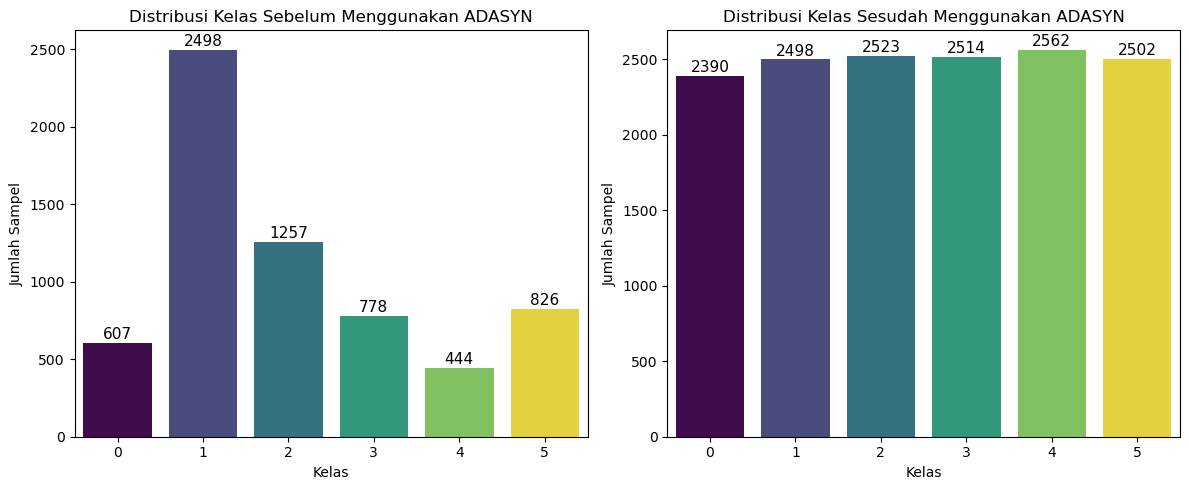

In [14]:
# Visualisasi distribusi data sebelum dan sesudah menggunakan ADASYN
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# sebelum menggunakan ADASYN
sns.countplot(x=y_train, ax=axes[0], hue=y_train, palette="viridis", legend=False)
axes[0].set_title("Distribusi Kelas Sebelum Menggunakan ADASYN")
axes[0].set_xlabel("Kelas")
axes[0].set_ylabel("Jumlah Sampel")

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='black',
                     xytext=(0, 6), textcoords='offset points')

# sesudah menggunakan ADASYN
sns.countplot(x=y_train_resampled, ax=axes[1], hue=y_train_resampled, palette="viridis", legend=False)
axes[1].set_title("Distribusi Kelas Sesudah Menggunakan ADASYN")
axes[1].set_xlabel("Kelas")
axes[1].set_ylabel("Jumlah Sampel")

for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='black',
                     xytext=(0, 6), textcoords='offset points')

plt.tight_layout()
plt.show()


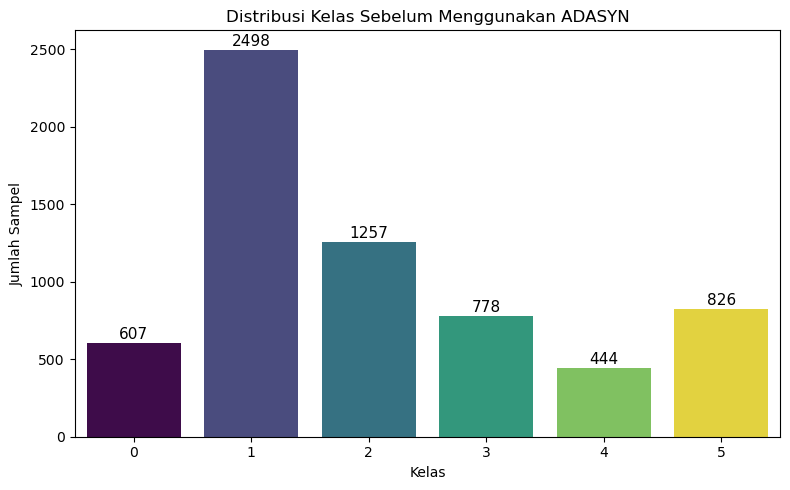

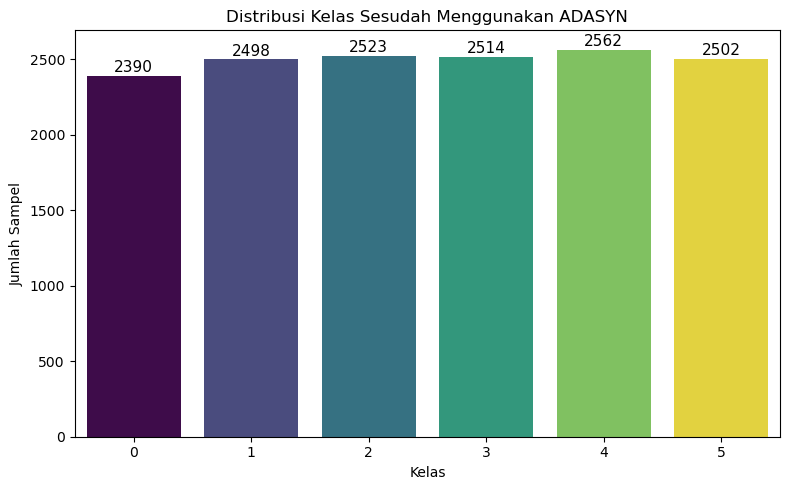

In [15]:
# visualisai distribusi data sebelum menggunakan ADASYN
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, hue=y_train, palette="viridis", legend=False)
plt.title("Distribusi Kelas Sebelum Menggunakan ADASYN")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Sampel")

for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black',
                 xytext=(0, 6), textcoords='offset points')

plt.tight_layout()
plt.savefig("sebelum_adasyn.png")  # <--- Simpan gambar
plt.show()

# visualisasi distribusi data sesudah menggunakan ADASYN
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_resampled, hue=y_train_resampled, palette="viridis", legend=False)
plt.title("Distribusi Kelas Sesudah Menggunakan ADASYN")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Sampel")

for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black',
                 xytext=(0, 6), textcoords='offset points')

plt.tight_layout()
plt.savefig("sesudah_adasyn.png")  # <--- Simpan gambar
plt.show()


# Model Default Parameters

In [ ]:
#Model CatBoost Baselin
modeldefault_CB = CatBoostClassifier(verbose=0)
modeldefault_CB.fit(X_train, y_train)
y_predCB = modeldefault_CB.predict(X_test)

#evaluasi model
print("\nClassification Report:")
print(classification_report(y_test, y_predCB, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.9801    0.9737    0.9769       152
           1     0.9826    0.9936    0.9880       624
           2     0.9968    0.9904    0.9936       314
           3     0.9643    0.9692    0.9668       195
           4     0.9908    0.9730    0.9818       111
           5     1.0000    0.9855    0.9927       207

    accuracy                         0.9857      1603
   macro avg     0.9858    0.9809    0.9833      1603
weighted avg     0.9857    0.9857    0.9857      1603



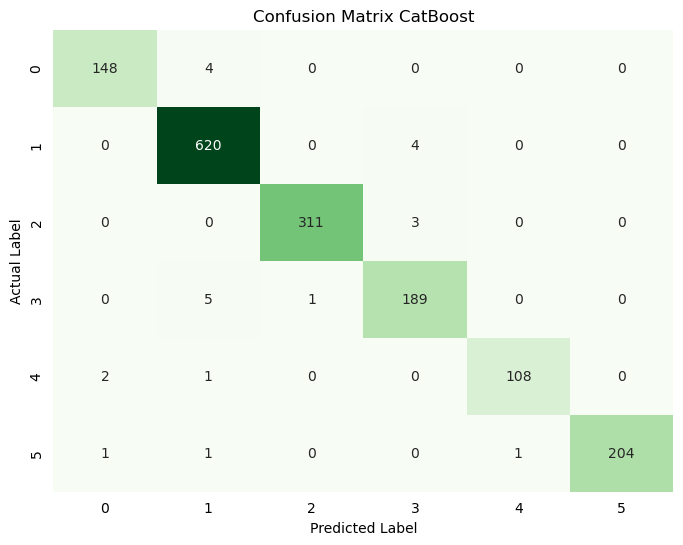

In [19]:
# Confusion Matrix CatBoost default parameters
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_predCB),
            annot=True,
            fmt='d',
            cmap='Greens',
            cbar=False)        
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix CatBoost")
plt.tick_params(left=False, bottom=False)
plt.show()

In [ ]:
#inisialisasi model
modeldefault_KNN = KNeighborsClassifier()

#fit model prediksi
modeldefault_KNN.fit(X_train, y_train)
y_predKNN = modeldefault_KNN.predict(X_test)

#evaluasi model
print("\nClassification Report:")
print(classification_report(y_test, y_predKNN, digits=4))

Akurasi per Fold:
Fold-1: 0.8580
Fold-2: 0.8268
Fold-3: 0.8378
Fold-4: 0.8534
Fold-5: 0.8315
Fold-6: 0.8315
Fold-7: 0.8097
Fold-8: 0.8471
Fold-9: 0.8378
Fold-10: 0.8596

Rata-rata Akurasi K-fold: 0.8393

Classification Report:
              precision    recall  f1-score   support

           0     0.6759    0.6447    0.6599       152
           1     0.8608    0.9119    0.8856       624
           2     0.9082    0.8822    0.8950       314
           3     0.7047    0.6974    0.7010       195
           4     0.7019    0.6577    0.6791       111
           5     0.9487    0.8937    0.9204       207

    accuracy                         0.8347      1603
   macro avg     0.8000    0.7813    0.7902      1603
weighted avg     0.8339    0.8347    0.8338      1603



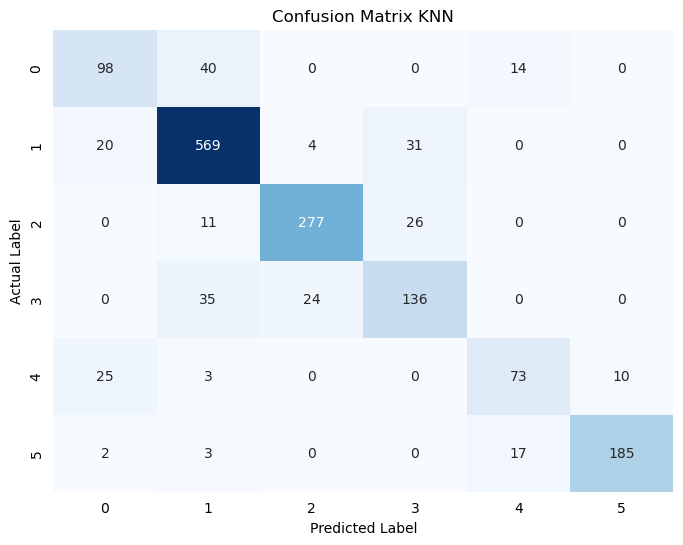

In [21]:
# Confusion Matrix KNN default parameters
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_predKNN),
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=False)        
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix KNN")
plt.tick_params(left=False, bottom=False)
plt.show()

In [22]:
# CatBoost metrics (macro)
acc_cb1 = accuracy_score(y_test, y_predCB)
f1_cb1 = f1_score(y_test, y_predCB, average='macro')
recall_cb1 = recall_score(y_test, y_predCB, average='macro')
prec_cb1 = precision_score(y_test, y_predCB, average='macro')

# KNN metrics (macro)
acc_knn1 = accuracy_score(y_test, y_predKNN)
f1_knn1 = f1_score(y_test, y_predKNN, average='macro')
recall_knn1 = recall_score(y_test, y_predKNN, average='macro')
prec_knn1 = precision_score(y_test, y_predKNN, average='macro')

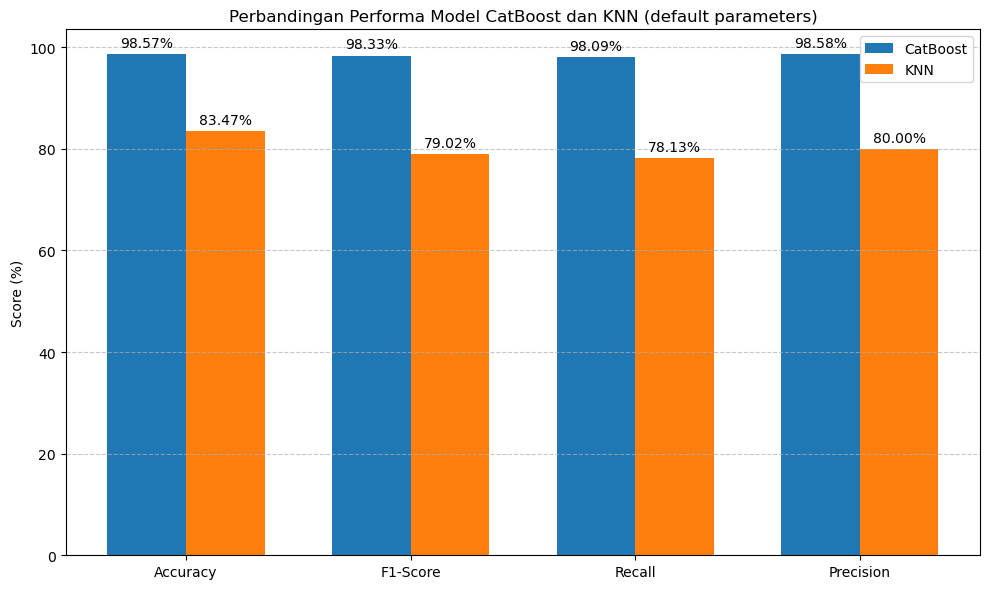

In [23]:
# Visualisasi perbandingan hasil evaluasi model CatBoost dan KNN (default parameters)
cb_scores = [acc_cb1, f1_cb1, recall_cb1, prec_cb1]
knn_scores = [acc_knn1, f1_knn1, recall_knn1, prec_knn1]

labels = ['Accuracy', 'F1-Score', 'Recall', 'Precision']

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, [s * 100 for s in cb_scores], width, label='CatBoost')
bars2 = ax.bar(x + width/2, [s * 100 for s in knn_scores], width, label='KNN')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',  
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_ylabel('Score (%)')
ax.set_title('Perbandingan Performa Model CatBoost dan KNN (default parameters)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Model dengan Oversampling

In [ ]:
#inisialisasi model
modelcb_adasyn = CatBoostClassifier(verbose=0)

#model prediksi
modelcb_adasyn.fit(X_train_resampled, y_train_resampled, verbose=0)
y_predcb_adasyn = modelcb_adasyn.predict(X_test)

#evaluasi model
print("\nClassification Report:")
print(classification_report(y_test, y_predcb_adasyn, digits=4))

Akurasi per Fold:
Fold-1: 0.9953
Fold-2: 0.9953
Fold-3: 0.9940
Fold-4: 0.9973
Fold-5: 0.9933
Fold-6: 0.9947
Fold-7: 0.9907
Fold-8: 0.9920
Fold-9: 0.9933
Fold-10: 0.9940

Rata-rata Akurasi K-fold: 0.9940

Classification Report:
              precision    recall  f1-score   support

           0     0.9801    0.9737    0.9769       152
           1     0.9888    0.9904    0.9896       624
           2     0.9968    0.9936    0.9952       314
           3     0.9646    0.9795    0.9720       195
           4     0.9908    0.9730    0.9818       111
           5     0.9903    0.9903    0.9903       207

    accuracy                         0.9869      1603
   macro avg     0.9853    0.9834    0.9843      1603
weighted avg     0.9869    0.9869    0.9869      1603



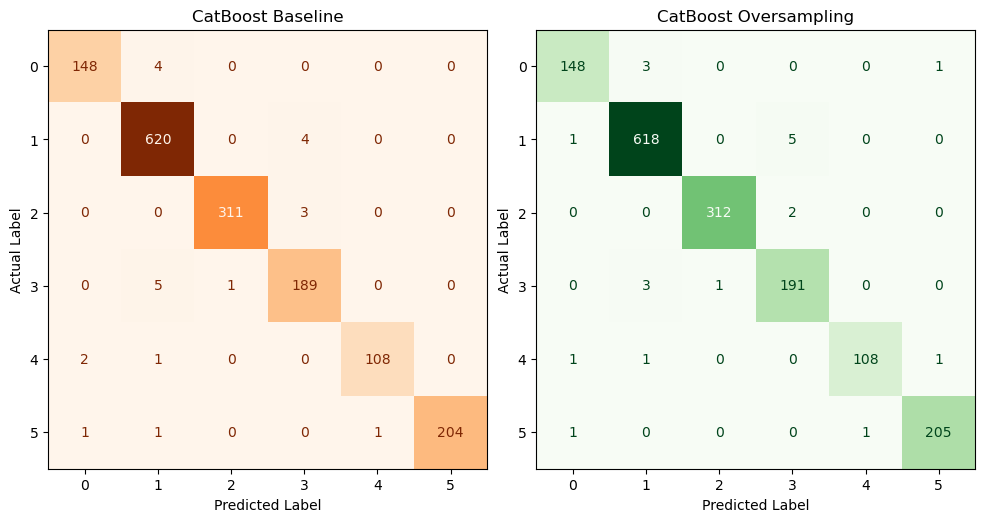

In [ ]:

# Confusion matrix untuk model default dan model adasyn
cm_default = confusion_matrix(y_test, y_predCB)
cm_adasyn = confusion_matrix(y_test, y_predcb_adasyn)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix model default dengan warna orange
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_default)
disp1.plot(ax=axes[0], cmap='Oranges', colorbar=False)
axes[0].set_title("CatBoost Baseline")

# Plot confusion matrix model ADASYN dengan warna hijau
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_adasyn)
disp2.plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title("CatBoost Oversampling")

# Set label ticks yang sesuai ukuran matriks
n_labels = cm_default.shape[0]
tick_labels = [str(i) for i in range(n_labels)]

for ax in axes:
    ax.set_xticks(range(n_labels))
    ax.set_yticks(range(n_labels))
    ax.set_xticklabels(tick_labels)
    ax.set_yticklabels(tick_labels)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')


# Rapikan tata letak dan atur jarak subplot supaya rapat
plt.tight_layout()
plt.subplots_adjust(wspace=0.1)  # wspace kecil biar nggak terlalu berjauhan

plt.show()


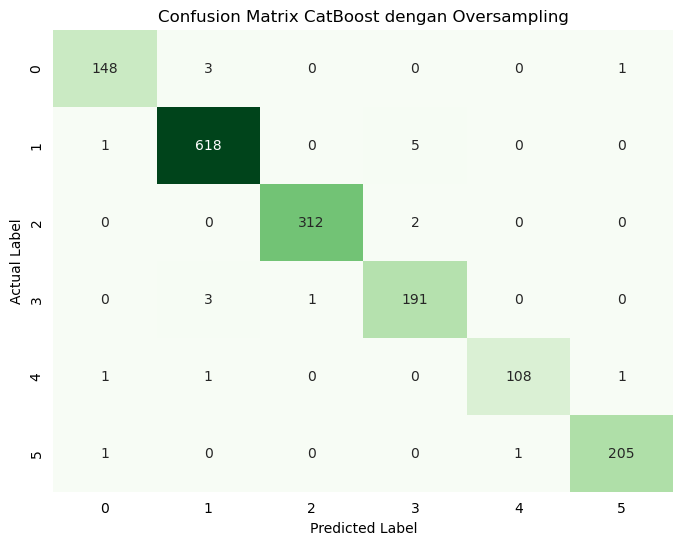

In [25]:
# Confusion Matrix CatBoost dengan Oversampling
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_predcb_adasyn),
            annot=True,
            fmt='d',
            cmap='Greens',
            cbar=False)        
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix CatBoost dengan Oversampling")
plt.tick_params(left=False, bottom=False)
plt.show()

In [ ]:
#inisialisasi model
modelknn_adasyn = KNeighborsClassifier()

#model prediksi
modelknn_adasyn.fit(X_train_resampled, y_train_resampled)
y_predknn_adasyn = modelknn_adasyn.predict(X_test)

#evaluasi model
print("\nClassification Report:")
print(classification_report(y_test, y_predknn_adasyn, digits=4))

Akurasi per Fold:
Fold-1: 0.9293
Fold-2: 0.9293
Fold-3: 0.9326
Fold-4: 0.9313
Fold-5: 0.9253
Fold-6: 0.9346
Fold-7: 0.9320
Fold-8: 0.9320
Fold-9: 0.9426
Fold-10: 0.9399

Rata-rata Akurasi K-fold: 0.9329

Classification Report:
              precision    recall  f1-score   support

           0     0.6684    0.8487    0.7478       152
           1     0.9606    0.7804    0.8612       624
           2     0.9333    0.9363    0.9348       314
           3     0.6491    0.8821    0.7478       195
           4     0.7778    0.8198    0.7982       111
           5     0.9515    0.9469    0.9492       207

    accuracy                         0.8540      1603
   macro avg     0.8234    0.8690    0.8398      1603
weighted avg     0.8758    0.8540    0.8581      1603



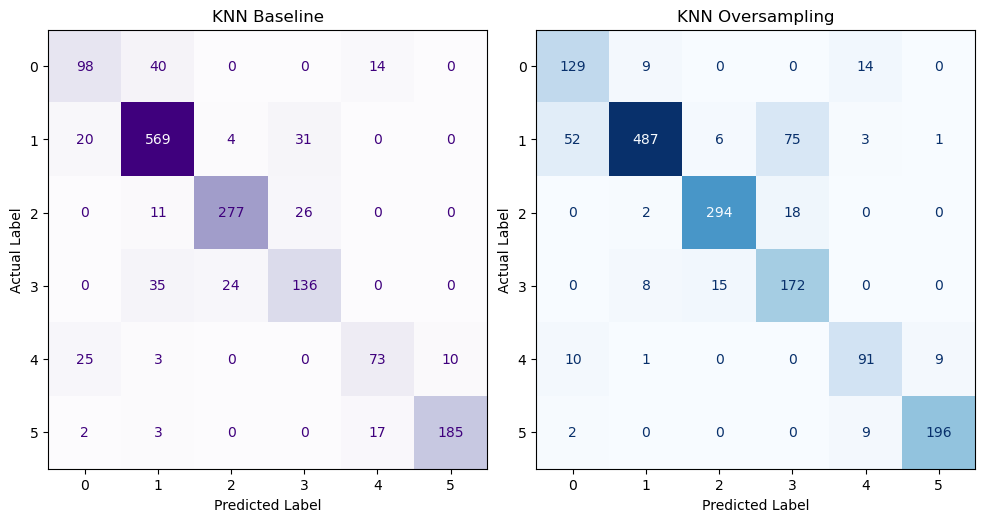

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix untuk model default KNN dan model ADASYN KNN
cm_default_knn = confusion_matrix(y_test, y_predKNN)
cm_adasyn_knn = confusion_matrix(y_test, y_predknn_adasyn)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix model default dengan warna ungu
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_default_knn)
disp1.plot(ax=axes[0], cmap='Purples', colorbar=False)
axes[0].set_title("KNN Baseline")

# Plot confusion matrix model ADASYN dengan warna biru
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_adasyn_knn)
disp2.plot(ax=axes[1], cmap='Blues', colorbar=False)
axes[1].set_title("KNN Oversampling")

# Set label ticks
n_labels = cm_default_knn.shape[0]
tick_labels = [str(i) for i in range(n_labels)]

for ax in axes:
    ax.set_xticks(range(n_labels))
    ax.set_yticks(range(n_labels))
    ax.set_xticklabels(tick_labels)
    ax.set_yticklabels(tick_labels)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')

# Tata letak
plt.tight_layout()
plt.subplots_adjust(wspace=0.1)

plt.show()


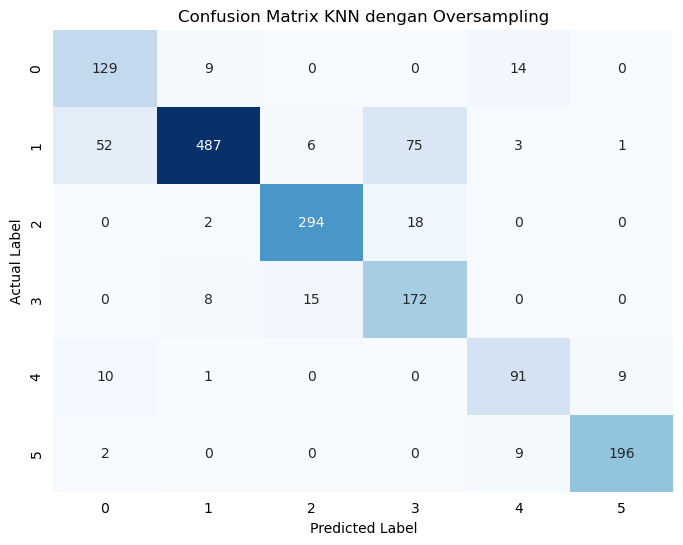

In [28]:
# Confusion Matrix KNN dengan Oversampling
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_predknn_adasyn),
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=False)        
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix KNN dengan Oversampling")
plt.tick_params(left=False, bottom=False)
plt.show()

In [29]:
# CatBoost metrics (macro)
acc_cb2 = accuracy_score(y_test, y_predcb_adasyn)
f1_cb2 = f1_score(y_test, y_predcb_adasyn, average='macro')
recall_cb2 = recall_score(y_test, y_predcb_adasyn, average='macro')
prec_cb2 = precision_score(y_test, y_predcb_adasyn, average='macro')

# KNN metrics (macro)
acc_knn2 = accuracy_score(y_test, y_predknn_adasyn)
f1_knn2 = f1_score(y_test, y_predknn_adasyn, average='macro')
recall_knn2 = recall_score(y_test, y_predknn_adasyn, average='macro')
prec_knn2 = precision_score(y_test, y_predknn_adasyn, average='macro')

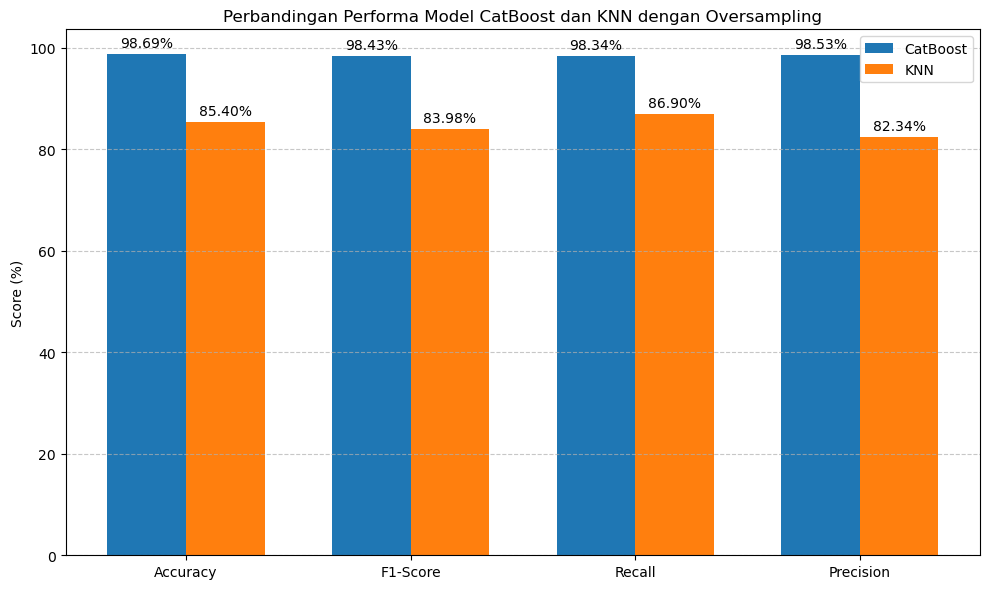

In [30]:
# Visualisasi perbandingan hasil evaluasi model CatBoost dan KNN (dengan Oversampling)
cb_scores2 = [acc_cb2, f1_cb2, recall_cb2, prec_cb2]
knn_scores2 = [acc_knn2, f1_knn2, recall_knn2, prec_knn2]
labels = ['Accuracy', 'F1-Score', 'Recall', 'Precision']

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, [s * 100 for s in cb_scores2], width, label='CatBoost')
bars2 = ax.bar(x + width/2, [s * 100 for s in knn_scores2], width, label='KNN')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',  
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
ax.set_ylabel('Score (%)')
ax.set_title('Perbandingan Performa Model CatBoost dan KNN dengan Oversampling')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Pencarian Parameter Terbaik

In [ ]:
# Pencarian parameter terbaik model CatBoost dengan Oversampling menggunakan Grid SearchCV
modelcb_tuning = CatBoostClassifier(iterations=1000, verbose=100)

param_cb = {
    'learning_rate': [0.1, 0.01, 0.001],
     'depth': [4, 5, 6, 7, 8]
}
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search_cb = GridSearchCV(
    estimator=modelcb_tuning,
    param_grid=param_cb,
    cv=kfold
)
grid_search_cb.fit(X_train_resampled, y_train_resampled)

best_modelcb = grid_search_cb.best_estimator_
print("Best Parameters:", grid_search_cb.best_params_)

0:	learn: 1.6380923	total: 8.96ms	remaining: 8.95s
100:	learn: 0.3262673	total: 606ms	remaining: 5.39s
200:	learn: 0.1870349	total: 1.22s	remaining: 4.84s
300:	learn: 0.1280655	total: 1.8s	remaining: 4.18s
400:	learn: 0.0983688	total: 2.37s	remaining: 3.55s
500:	learn: 0.0774406	total: 2.95s	remaining: 2.94s
600:	learn: 0.0637050	total: 3.52s	remaining: 2.34s
700:	learn: 0.0551660	total: 4.09s	remaining: 1.75s
800:	learn: 0.0481705	total: 4.68s	remaining: 1.16s
900:	learn: 0.0424101	total: 5.31s	remaining: 584ms
999:	learn: 0.0381392	total: 5.87s	remaining: 0us
0:	learn: 1.6392926	total: 7.23ms	remaining: 7.22s
100:	learn: 0.3293204	total: 595ms	remaining: 5.3s
200:	learn: 0.1854627	total: 1.18s	remaining: 4.69s
300:	learn: 0.1263331	total: 1.76s	remaining: 4.08s
400:	learn: 0.0952028	total: 2.33s	remaining: 3.48s
500:	learn: 0.0758527	total: 2.91s	remaining: 2.9s
600:	learn: 0.0631774	total: 3.48s	remaining: 2.31s
700:	learn: 0.0544655	total: 4.05s	remaining: 1.73s
800:	learn: 0.04668

In [20]:
results = pd.DataFrame(grid_search_cb.cv_results_)
tabel_hasilCB = results[['param_learning_rate', 'param_depth', 'mean_test_score', 'rank_test_score']]
tabel_hasilCB = tabel_hasilCB.sort_values(by='rank_test_score')
tabel_hasilCB = tabel_hasilCB.reset_index(drop=True)

print("\nTabel Hasil GridSearch CatBoost:")
print(tabel_hasilCB)


Tabel Hasil GridSearch CatBoost:
   param_learning_rate param_depth  mean_test_score  rank_test_score
0                  0.1           8         0.995063                1
1                  0.1           7         0.994796                2
2                  0.1           6         0.994196                3
3                  0.1           5         0.993929                4
4                  0.1           4         0.992461                5
5                 0.01           8         0.980786                6
6                 0.01           7         0.976716                7
7                 0.01           6         0.971913                8
8                 0.01           5         0.964307                9
9                 0.01           4         0.954367               10
10               0.001           8         0.892855               11
11               0.001           7         0.882247               12
12               0.001           6         0.862566               13


In [ ]:
# prediksi menggunakan parameter terbaik hasil Grid SearchCV pada model CatBoost Oversampling
y_predcb_tuning = best_modelcb.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_predcb_tuning, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0    0.97368   0.97368   0.97368       152
           1    0.98565   0.99038   0.98801       624
           2    0.99679   0.99045   0.99361       314
           3    0.95939   0.96923   0.96429       195
           4    0.99083   0.97297   0.98182       111
           5    0.99515   0.99034   0.99274       207

    accuracy                        0.98503      1603
   macro avg    0.98358   0.98118   0.98236      1603
weighted avg    0.98509   0.98503   0.98504      1603



Hasil evaluasi menggunakan parameter terbaik dari Grid Search berdasarkan rata-rata skor pengujian (mean test score) dari 10-fold cross-validation belum menunjukkan peningkatan performa dibandingkan model CatBoost dengan Oversampling. Oleh karena itu penulis melakukan percobaan terhadap 5 kombinasi parameter terbaik pada data uji (test data)

In [40]:
# kombinasi parameter terbaik 1
modelcb_pr1 = CatBoostClassifier(iterations=1000,
learning_rate=0.1,
depth=8,
verbose=100)

modelcb_pr1.fit(X_train_resampled, y_train_resampled)

y_predcb_pr1 = modelcb_pr1.predict(X_test)

# Hasil evaluasi
print("\nClassification Report:")
print(classification_report(y_test, y_predcb_pr1, digits=4))

0:	learn: 1.5536084	total: 49.5ms	remaining: 49.5s
100:	learn: 0.1447830	total: 4.04s	remaining: 36s
200:	learn: 0.0663986	total: 7.96s	remaining: 31.6s
300:	learn: 0.0418517	total: 12s	remaining: 27.9s
400:	learn: 0.0306768	total: 16.1s	remaining: 24.1s
500:	learn: 0.0231940	total: 20s	remaining: 20s
600:	learn: 0.0188046	total: 23.8s	remaining: 15.8s
700:	learn: 0.0156150	total: 27.6s	remaining: 11.8s
800:	learn: 0.0132806	total: 31.6s	remaining: 7.86s
900:	learn: 0.0115476	total: 35.4s	remaining: 3.89s
999:	learn: 0.0102819	total: 39.1s	remaining: 0us

Classification Report:
              precision    recall  f1-score   support

           0     0.9737    0.9737    0.9737       152
           1     0.9856    0.9904    0.9880       624
           2     0.9968    0.9904    0.9936       314
           3     0.9594    0.9692    0.9643       195
           4     0.9908    0.9730    0.9818       111
           5     0.9951    0.9903    0.9927       207

    accuracy                       

In [41]:
# kombinasi parameter terbaik 2
modelcb_pr2 = CatBoostClassifier(iterations=1000,
learning_rate=0.1,
depth=7,
verbose=100)

modelcb_pr2.fit(X_train_resampled, y_train_resampled)

y_predcb_pr2 = modelcb_pr2.predict(X_test)

# Hasil evaluasi
print("\nClassification Report:")
print(classification_report(y_test, y_predcb_pr2, digits=4))

0:	learn: 1.5918169	total: 31.2ms	remaining: 31.1s
100:	learn: 0.1680429	total: 2.51s	remaining: 22.3s
200:	learn: 0.0814811	total: 4.92s	remaining: 19.6s
300:	learn: 0.0511847	total: 7.26s	remaining: 16.9s
400:	learn: 0.0366072	total: 9.57s	remaining: 14.3s
500:	learn: 0.0282841	total: 12s	remaining: 11.9s
600:	learn: 0.0232598	total: 14.3s	remaining: 9.48s
700:	learn: 0.0191977	total: 16.6s	remaining: 7.09s
800:	learn: 0.0164504	total: 19.1s	remaining: 4.74s
900:	learn: 0.0142187	total: 21.6s	remaining: 2.37s
999:	learn: 0.0123039	total: 24s	remaining: 0us

Classification Report:
              precision    recall  f1-score   support

           0     0.9673    0.9737    0.9705       152
           1     0.9873    0.9936    0.9904       624
           2     0.9968    0.9873    0.9920       314
           3     0.9645    0.9744    0.9694       195
           4     0.9908    0.9730    0.9818       111
           5     1.0000    0.9903    0.9951       207

    accuracy                   

In [42]:
# kombinasi parameter terbaik 3
modelcb_pr3 = CatBoostClassifier(iterations=1000,
learning_rate=0.1,
depth=6,
verbose=100)

modelcb_pr3.fit(X_train_resampled, y_train_resampled)

y_predcb_pr3 = modelcb_pr3.predict(X_test)

# Hasil evaluasi
print("\nClassification Report:")
print(classification_report(y_test, y_predcb_pr3, digits=4))

0:	learn: 1.6024091	total: 16.4ms	remaining: 16.4s
100:	learn: 0.2051961	total: 1.24s	remaining: 11.1s
200:	learn: 0.1035990	total: 2.58s	remaining: 10.3s
300:	learn: 0.0682940	total: 3.94s	remaining: 9.16s
400:	learn: 0.0492701	total: 5.19s	remaining: 7.76s
500:	learn: 0.0380723	total: 6.5s	remaining: 6.47s
600:	learn: 0.0309893	total: 7.74s	remaining: 5.14s
700:	learn: 0.0257905	total: 9.02s	remaining: 3.85s
800:	learn: 0.0220098	total: 10.4s	remaining: 2.58s
900:	learn: 0.0191733	total: 11.6s	remaining: 1.28s
999:	learn: 0.0171740	total: 12.9s	remaining: 0us

Classification Report:
              precision    recall  f1-score   support

           0     0.9610    0.9737    0.9673       152
           1     0.9904    0.9904    0.9904       624
           2     0.9968    0.9936    0.9952       314
           3     0.9695    0.9795    0.9745       195
           4     0.9907    0.9640    0.9772       111
           5     0.9903    0.9903    0.9903       207

    accuracy                

In [43]:
# kombinasi parameter terbaik 4
modelcb_pr4 = CatBoostClassifier(iterations=1000,
learning_rate=0.1,
depth=5,
verbose=100)

modelcb_pr4.fit(X_train_resampled, y_train_resampled)

y_predcb_pr4 = modelcb_pr4.predict(X_test)

# Hasil evaluasi
print("\nClassification Report:")
print(classification_report(y_test, y_predcb_pr4, digits=4))

0:	learn: 1.6238517	total: 15ms	remaining: 15s
100:	learn: 0.2473777	total: 919ms	remaining: 8.18s
200:	learn: 0.1367698	total: 1.82s	remaining: 7.22s
300:	learn: 0.0903690	total: 2.75s	remaining: 6.38s
400:	learn: 0.0654211	total: 3.6s	remaining: 5.38s
500:	learn: 0.0527020	total: 4.45s	remaining: 4.43s
600:	learn: 0.0417271	total: 5.28s	remaining: 3.51s
700:	learn: 0.0357182	total: 6.12s	remaining: 2.61s
800:	learn: 0.0310483	total: 6.98s	remaining: 1.73s
900:	learn: 0.0268883	total: 7.81s	remaining: 858ms
999:	learn: 0.0239026	total: 8.68s	remaining: 0us

Classification Report:
              precision    recall  f1-score   support

           0     0.9739    0.9803    0.9770       152
           1     0.9888    0.9920    0.9904       624
           2     0.9968    0.9936    0.9952       314
           3     0.9742    0.9692    0.9717       195
           4     0.9909    0.9820    0.9864       111
           5     0.9952    0.9952    0.9952       207

    accuracy                    

In [44]:
# kombinasi parameter terbaik 5
modelcb_pr5 = CatBoostClassifier(iterations=1000,
learning_rate=0.1,
depth=4,
verbose=100)

modelcb_pr5.fit(X_train_resampled, y_train_resampled)

y_predcb_pr5 = modelcb_pr5.predict(X_test)

# Hasil evaluasi
print("\nClassification Report:")
print(classification_report(y_test, y_predcb_pr5, digits=4))

0:	learn: 1.6538099	total: 13.7ms	remaining: 13.6s
100:	learn: 0.3282952	total: 713ms	remaining: 6.35s
200:	learn: 0.1878295	total: 1.42s	remaining: 5.64s
300:	learn: 0.1276625	total: 2.28s	remaining: 5.3s
400:	learn: 0.0940383	total: 2.99s	remaining: 4.47s
500:	learn: 0.0758331	total: 3.74s	remaining: 3.73s
600:	learn: 0.0622975	total: 4.39s	remaining: 2.91s
700:	learn: 0.0521069	total: 5.01s	remaining: 2.14s
800:	learn: 0.0450429	total: 5.66s	remaining: 1.41s
900:	learn: 0.0400980	total: 6.35s	remaining: 698ms
999:	learn: 0.0366464	total: 7.07s	remaining: 0us

Classification Report:
              precision    recall  f1-score   support

           0     0.9613    0.9803    0.9707       152
           1     0.9935    0.9856    0.9895       624
           2     0.9936    0.9936    0.9936       314
           3     0.9645    0.9744    0.9694       195
           4     0.9908    0.9730    0.9818       111
           5     0.9856    0.9952    0.9904       207

    accuracy                

Berdasarkan hasil percobaan terhadap lima kombinasi parameter terbaik yang diperoleh dari nilai mean test score, diperoleh bahwa kombinasi parameter ke-4 menghasilkan nilai akurasi, f1-score, recall, dan precision yang lebih tinggi dibandingkan empat kombinasi lainnya. Oleh karena itu, model yang digunakan adalah model dengan kombinasi parameter ke-4, yaitu learning_rate sebesar 0.1 dan depth sebesar 5. Setelah mendapatkan kombinasi hyperparameter terbaik, selanjutnya dilakukan pengujian performa model dengan validasi menggunakan metode k-fold cross validation dengan nilai k=10

In [45]:
from sklearn.model_selection import cross_val_score, KFold
# Validasi Model
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(modelcb_pr4, X_train_resampled, y_train_resampled, cv=kfold, scoring='accuracy')

print("Akurasi per fold:")
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1}: {score:.4f}")

print(f"\nRata-rata Akurasi: {cv_scores.mean():.4f}")

0:	learn: 1.6151877	total: 18.2ms	remaining: 18.2s
100:	learn: 0.2519452	total: 870ms	remaining: 7.74s
200:	learn: 0.1350994	total: 1.85s	remaining: 7.37s
300:	learn: 0.0914898	total: 2.74s	remaining: 6.36s
400:	learn: 0.0688162	total: 3.59s	remaining: 5.37s
500:	learn: 0.0535549	total: 4.42s	remaining: 4.4s
600:	learn: 0.0442506	total: 5.23s	remaining: 3.47s
700:	learn: 0.0373148	total: 6.08s	remaining: 2.6s
800:	learn: 0.0321203	total: 7s	remaining: 1.74s
900:	learn: 0.0284154	total: 7.99s	remaining: 878ms
999:	learn: 0.0247114	total: 8.85s	remaining: 0us
0:	learn: 1.6165887	total: 11.2ms	remaining: 11.1s
100:	learn: 0.2597915	total: 878ms	remaining: 7.81s
200:	learn: 0.1376098	total: 1.86s	remaining: 7.41s
300:	learn: 0.0928393	total: 2.75s	remaining: 6.38s
400:	learn: 0.0683764	total: 3.58s	remaining: 5.36s
500:	learn: 0.0541045	total: 4.41s	remaining: 4.39s
600:	learn: 0.0442641	total: 5.24s	remaining: 3.48s
700:	learn: 0.0366387	total: 6.08s	remaining: 2.59s
800:	learn: 0.0316014

In [ ]:
# Pencarian parameter terbaik model KNN dengan Oversampling menggunakan Grid SearchCV
modelknn_tuning = KNeighborsClassifier()
param_knn = {
    'n_neighbors': list(range(3, 30, 2)),  
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]  # Manhattan, Euclidean, Minkowski
}
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search_knn = GridSearchCV(
    estimator=modelknn_tuning,
    param_grid=param_knn,
    cv=kfold
)
grid_search_knn.fit(X_train_resampled, y_train_resampled)

best_modelknn = grid_search_knn.best_estimator_
print("Best Parameters:", grid_search_knn.best_params_)

Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [29]:
results = pd.DataFrame(grid_search_knn.cv_results_)
tabel_hasilknn = results[['param_n_neighbors', 'param_weights', 'param_p', 'mean_test_score', 'rank_test_score']]
tabel_hasilknn = tabel_hasilknn.sort_values(by='rank_test_score')
tabel_hasilknn = tabel_hasilknn.reset_index(drop=True)

print("\nTabel Hasil GridSearch KNN:")
print(tabel_hasilknn)


Tabel Hasil GridSearch KNN:
   param_n_neighbors param_weights param_p  mean_test_score  rank_test_score
0                  3      distance       1         0.968644                1
1                  5      distance       1         0.964040                2
2                  3      distance       2         0.963373                3
3                  3      distance       3         0.961038                4
4                  7      distance       1         0.960838                5
..               ...           ...     ...              ...              ...
79                27       uniform       2         0.823604               80
80                25       uniform       3         0.820669               81
81                29       uniform       2         0.817266               82
82                27       uniform       3         0.810128               83
83                29       uniform       3         0.805658               84

[84 rows x 5 columns]


In [ ]:
# prediksi menggunakan parameter terbaik hasil Grid SearchCV pada model KNN Oversampling
y_predknn_tuning = best_modelknn.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_predknn_tuning, digits=5))


Classification Report:
              precision    recall  f1-score   support

           0    0.82036   0.90132   0.85893       152
           1    0.96187   0.88942   0.92423       624
           2    0.96405   0.93949   0.95161       314
           3    0.74576   0.90256   0.81671       195
           4    0.85981   0.82883   0.84404       111
           5    0.94286   0.95652   0.94964       207

    accuracy                        0.90643      1603
   macro avg    0.88245   0.90302   0.89086      1603
weighted avg    0.91307   0.90643   0.90805      1603



Sama halnya dengan model CatBoost, pada model KNN juga dilakukan percobaan terhadap 5 kombinasi parameter terbaik berdasarkan hasil Grid Search, yang kemudian diuji pada data uji (test data) untuk mengevaluasi performanya.

In [46]:
# Kombinasi parameter terbaik 1
modelknn_pr1 = KNeighborsClassifier(
    n_neighbors=3,
    weights='distance',
    p=1
) 
modelknn_pr1.fit(X_train_resampled, y_train_resampled)

y_predknn_pr1 = modelknn_pr1.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_predknn_pr1, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.8204    0.9013    0.8589       152
           1     0.9619    0.8894    0.9242       624
           2     0.9641    0.9395    0.9516       314
           3     0.7458    0.9026    0.8167       195
           4     0.8598    0.8288    0.8440       111
           5     0.9429    0.9565    0.9496       207

    accuracy                         0.9064      1603
   macro avg     0.8825    0.9030    0.8909      1603
weighted avg     0.9131    0.9064    0.9081      1603



In [47]:
# Kombinasi parameter terbaik 2
modelknn_pr2 = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    p=1
) 
modelknn_pr2.fit(X_train_resampled, y_train_resampled)

y_predknn_pr2 = modelknn_pr2.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_predknn_pr2, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.8000    0.8947    0.8447       152
           1     0.9712    0.8638    0.9143       624
           2     0.9548    0.9427    0.9487       314
           3     0.7154    0.9026    0.7982       195
           4     0.8378    0.8378    0.8378       111
           5     0.9431    0.9614    0.9522       207

    accuracy                         0.8977      1603
   macro avg     0.8704    0.9005    0.8827      1603
weighted avg     0.9078    0.8977    0.8999      1603



In [48]:
# Kombinasi parameter terbaik 3
modelknn_pr3 = KNeighborsClassifier(
    n_neighbors=3,
    weights='distance',
    p=2
) 
modelknn_pr3.fit(X_train_resampled, y_train_resampled)

y_predknn_pr3 = modelknn_pr3.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_predknn_pr3, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.7725    0.8487    0.8088       152
           1     0.9543    0.8702    0.9103       624
           2     0.9577    0.9363    0.9469       314
           3     0.7190    0.8923    0.7963       195
           4     0.8318    0.8018    0.8165       111
           5     0.9431    0.9614    0.9522       207

    accuracy                         0.8908      1603
   macro avg     0.8631    0.8851    0.8718      1603
weighted avg     0.8992    0.8908    0.8929      1603



In [49]:
# Kombinasi parameter terbaik 4
modelknn_pr4 = KNeighborsClassifier(
    n_neighbors=3,
    weights='distance',
    p=3
) 
modelknn_pr4.fit(X_train_resampled, y_train_resampled)

y_predknn_pr4 = modelknn_pr4.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_predknn_pr4, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.7791    0.8355    0.8063       152
           1     0.9513    0.8766    0.9124       624
           2     0.9608    0.9363    0.9484       314
           3     0.7292    0.8974    0.8046       195
           4     0.8182    0.8108    0.8145       111
           5     0.9474    0.9565    0.9519       207

    accuracy                         0.8927      1603
   macro avg     0.8643    0.8855    0.8730      1603
weighted avg     0.9001    0.8927    0.8946      1603



In [50]:
# Kombinasi parameter terbaik 5
modelknn_pr5 = KNeighborsClassifier(
    n_neighbors=7,
    weights='distance',
    p=1
) 
modelknn_pr5.fit(X_train_resampled, y_train_resampled)

y_predknn_pr5 = modelknn_pr5.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_predknn_pr5, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.7657    0.8816    0.8196       152
           1     0.9721    0.8381    0.9002       624
           2     0.9609    0.9395    0.9501       314
           3     0.6911    0.9179    0.7885       195
           4     0.8304    0.8378    0.8341       111
           5     0.9434    0.9662    0.9547       207

    accuracy                         0.8883      1603
   macro avg     0.8606    0.8969    0.8745      1603
weighted avg     0.9026    0.8883    0.8912      1603



Berdasarkan hasil percobaan terhadap lima kombinasi parameter terbaik yang diperoleh dari nilai mean test score, diperoleh bahwa kombinasi parameter ke-1 menghasilkan nilai akurasi, f1-score, recall, dan precision yang lebih tinggi dibandingkan empat kombinasi lainnya. Oleh karena itu, model yang digunakan adalah model dengan kombinasi parameter ke-1, yaitu n_neighbors sebesar 3, weights=distance dan p=1. Setelah mendapatkan kombinasi hyperparameter terbaik, selanjutnya dilakukan pengujian performa model dengan validasi menggunakan metode k-fold cross validation dengan nilai k=10

In [51]:
# Validasi Model KNN
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(modelknn_pr1, X_train_resampled, y_train_resampled, cv=kfold, scoring='accuracy')

print("Akurasi per fold:")
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1}: {score:.4f}")

print(f"\nRata-rata Akurasi: {cv_scores.mean():.4f}")

Akurasi per fold:
Fold 1: 0.9706
Fold 2: 0.9640
Fold 3: 0.9706
Fold 4: 0.9693
Fold 5: 0.9660
Fold 6: 0.9726
Fold 7: 0.9660
Fold 8: 0.9653
Fold 9: 0.9753
Fold 10: 0.9666

Rata-rata Akurasi: 0.9686


# Model dengan Oversampling dan Hyperparameter Tuning

In [53]:
# Model CatBoost dengan Oversampling dan Hyperparameter Tuning
modelcb_pr4 = CatBoostClassifier(iterations=1000,
learning_rate=0.1,
depth=5,
verbose=100)

modelcb_pr4.fit(X_train_resampled, y_train_resampled)

y_predcb_pr4 = modelcb_pr4.predict(X_test)

# Hasil evaluasi
print("\nClassification Report:")
print(classification_report(y_test, y_predcb_pr4, digits=4))

0:	learn: 1.6238517	total: 20ms	remaining: 20s
100:	learn: 0.2473777	total: 1.2s	remaining: 10.7s
200:	learn: 0.1367698	total: 2.29s	remaining: 9.1s
300:	learn: 0.0903690	total: 3.18s	remaining: 7.38s
400:	learn: 0.0654211	total: 4.09s	remaining: 6.11s
500:	learn: 0.0527020	total: 4.95s	remaining: 4.93s
600:	learn: 0.0417271	total: 5.83s	remaining: 3.87s
700:	learn: 0.0357182	total: 6.83s	remaining: 2.91s
800:	learn: 0.0310483	total: 7.71s	remaining: 1.92s
900:	learn: 0.0268883	total: 8.63s	remaining: 949ms
999:	learn: 0.0239026	total: 9.63s	remaining: 0us

Classification Report:
              precision    recall  f1-score   support

           0     0.9739    0.9803    0.9770       152
           1     0.9888    0.9920    0.9904       624
           2     0.9968    0.9936    0.9952       314
           3     0.9742    0.9692    0.9717       195
           4     0.9909    0.9820    0.9864       111
           5     0.9952    0.9952    0.9952       207

    accuracy                     

In [54]:
#validasi model dengan cross validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(modelcb_adasyn, X_train_resampled, y_train_resampled, cv=kfold, scoring='accuracy')

print("Akurasi per Fold:")
for i, score in enumerate(scores, 1):
    print(f"Fold-{i}: {score:.4f}")

print(f"\nRata-rata Akurasi K-fold: {np.mean(scores):.4f}")

Akurasi per Fold:
Fold-1: 0.9953
Fold-2: 0.9953
Fold-3: 0.9940
Fold-4: 0.9973
Fold-5: 0.9933
Fold-6: 0.9947
Fold-7: 0.9907
Fold-8: 0.9920
Fold-9: 0.9933
Fold-10: 0.9940

Rata-rata Akurasi K-fold: 0.9940


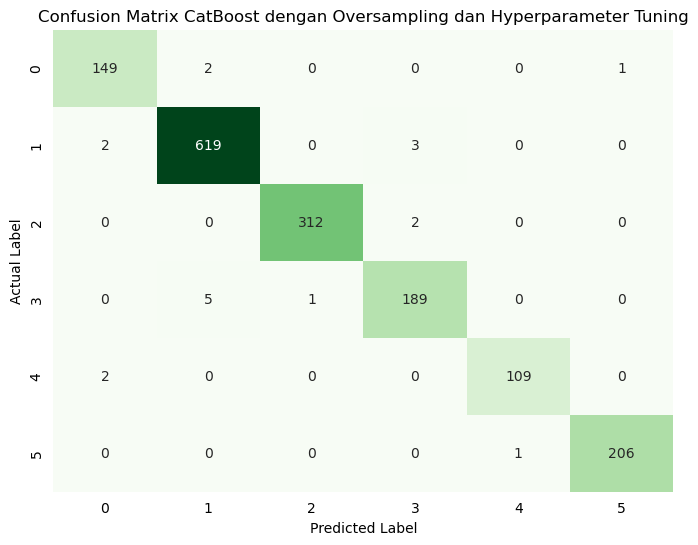

In [55]:
# Confusion Matrix Model CatBoost dengan Oversampling dan Hyperparameter Tuning
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_predcb_pr4),
            annot=True,
            fmt='d',
            cmap='Greens',
            cbar=False)        
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix CatBoost dengan Oversampling dan Hyperparameter Tuning")
plt.tick_params(left=False, bottom=False)
plt.show()

In [56]:
# Model KNN dengan Oversampling dan Hyperparameter Tuning
modelknn_pr1 = KNeighborsClassifier(
    n_neighbors=3,
    weights='distance',
    p=1
) 
modelknn_pr1.fit(X_train_resampled, y_train_resampled)

y_predknn_pr1 = modelknn_pr1.predict(X_test)

# Hasil Evaluasi
print("\nClassification Report:")
print(classification_report(y_test, y_predknn_pr1, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.8204    0.9013    0.8589       152
           1     0.9619    0.8894    0.9242       624
           2     0.9641    0.9395    0.9516       314
           3     0.7458    0.9026    0.8167       195
           4     0.8598    0.8288    0.8440       111
           5     0.9429    0.9565    0.9496       207

    accuracy                         0.9064      1603
   macro avg     0.8825    0.9030    0.8909      1603
weighted avg     0.9131    0.9064    0.9081      1603



In [57]:
#validasi model dengan cross validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(modelknn_pr1, X_train_resampled, y_train_resampled, cv=kfold, scoring='accuracy')

print("Akurasi per Fold:")
for i, score in enumerate(scores, 1):
    print(f"Fold-{i}: {score:.4f}")

print(f"\nRata-rata Akurasi K-fold: {np.mean(scores):.4f}")

Akurasi per Fold:
Fold-1: 0.9706
Fold-2: 0.9640
Fold-3: 0.9706
Fold-4: 0.9693
Fold-5: 0.9660
Fold-6: 0.9726
Fold-7: 0.9660
Fold-8: 0.9653
Fold-9: 0.9753
Fold-10: 0.9666

Rata-rata Akurasi K-fold: 0.9686


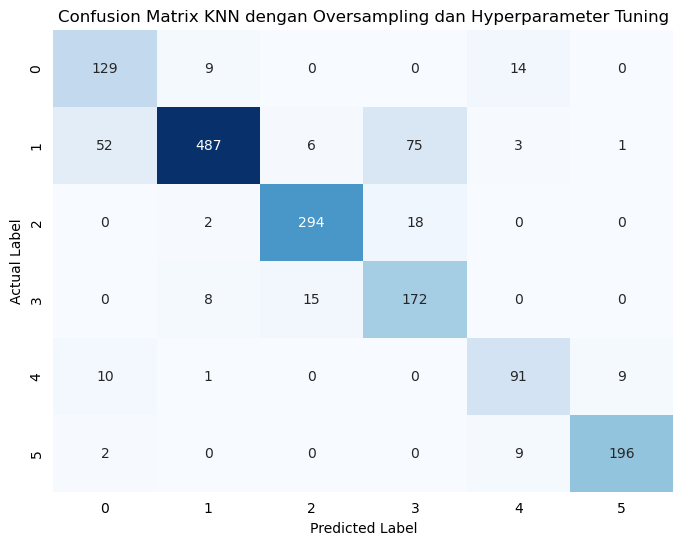

In [58]:
# Confusion Matrix KNN dengan ADASYN dan parameter tuning
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_predknn_adasyn),
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=False)        
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix KNN dengan Oversampling dan Hyperparameter Tuning")
plt.tick_params(left=False, bottom=False)
plt.show()

In [59]:
# CatBoost metrics (macro)
acc_cb3 = accuracy_score(y_test, y_predcb_pr4)
f1_cb3 = f1_score(y_test, y_predcb_pr4, average='macro')
recall_cb3 = recall_score(y_test, y_predcb_pr4, average='macro')
prec_cb3 = precision_score(y_test, y_predcb_pr4, average='macro')

# KNN metrics (macro)
acc_knn3 = accuracy_score(y_test, y_predknn_pr1)
f1_knn3 = f1_score(y_test, y_predknn_pr1, average='macro')
recall_knn3 = recall_score(y_test, y_predknn_pr1, average='macro')
prec_knn3 = precision_score(y_test, y_predknn_pr1, average='macro')


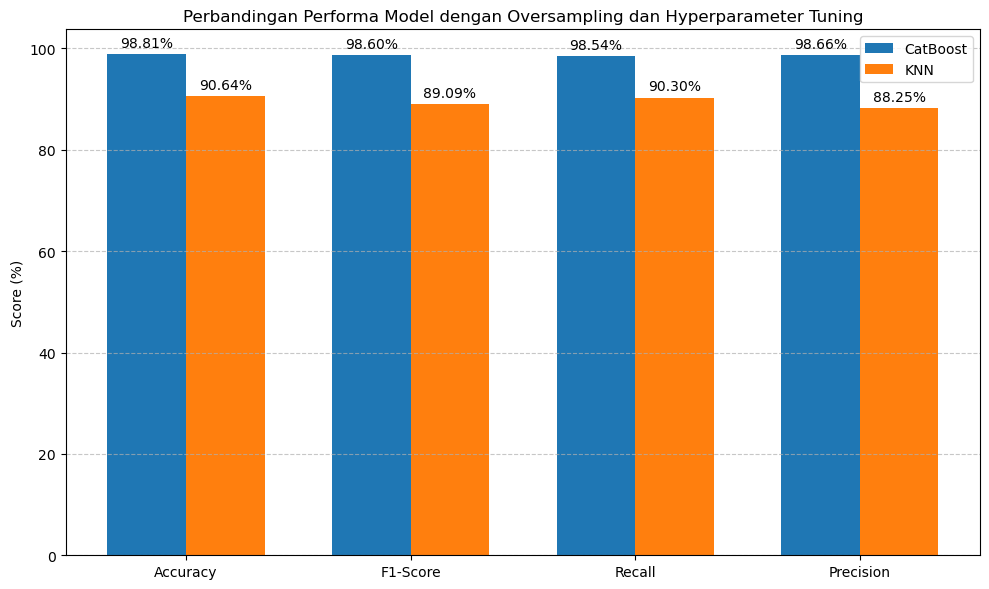

In [60]:
import matplotlib.pyplot as plt
import numpy as np

cb_scores3 = [acc_cb3, f1_cb3, recall_cb3, prec_cb3]
knn_scores3 = [acc_knn3, f1_knn3, recall_knn3, prec_knn3]

labels = ['Accuracy', 'F1-Score', 'Recall', 'Precision']

x = np.arange(len(labels))  
width = 0.35 

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, [s * 100 for s in cb_scores3], width, label='CatBoost')
bars2 = ax.bar(x + width/2, [s * 100 for s in knn_scores3], width, label='KNN')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_ylabel('Score (%)')
ax.set_title('Perbandingan Performa Model dengan Oversampling dan Hyperparameter Tuning')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Perbandingan Model CatBoost

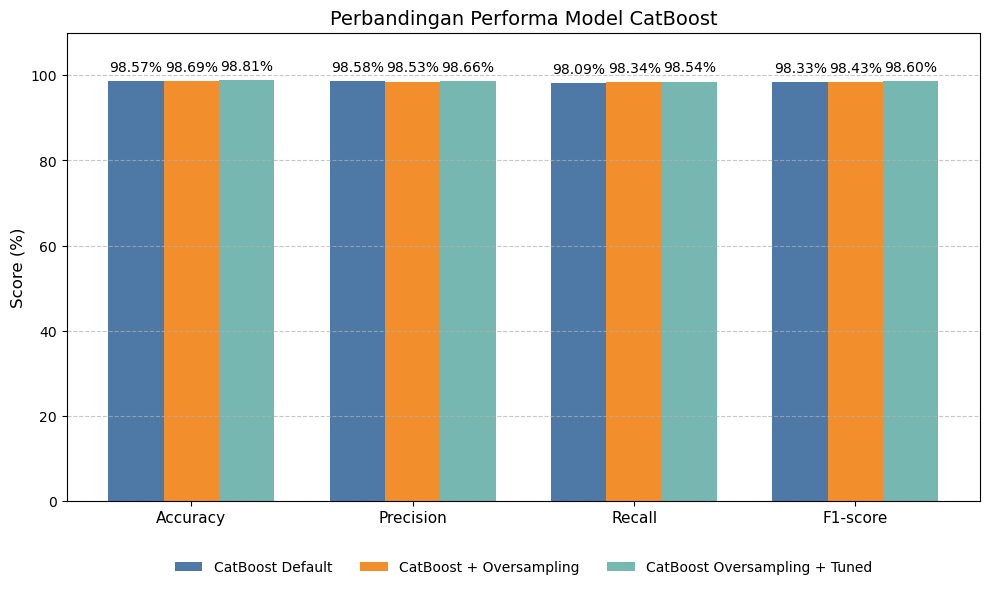

In [61]:
# Model CatBoost Default Parameters
metrics_default = [
    accuracy_score(y_test, y_predCB),
    precision_score(y_test, y_predCB, average='macro'),
    recall_score(y_test, y_predCB, average='macro'),
    f1_score(y_test, y_predCB, average='macro')
]

# Model CatBoost Oversampling
metrics_adasyn = [
    accuracy_score(y_test, y_predcb_adasyn),
    precision_score(y_test, y_predcb_adasyn, average='macro'),
    recall_score(y_test, y_predcb_adasyn, average='macro'),
    f1_score(y_test, y_predcb_adasyn, average='macro')
]

# Model CatBoost Oversampling dan Hyperparameter Tuning
metrics_best = [
    accuracy_score(y_test, y_predcb_pr4),
    precision_score(y_test, y_predcb_pr4, average='macro'),
    recall_score(y_test, y_predcb_pr4, average='macro'),
    f1_score(y_test, y_predcb_pr4, average='macro')
]

labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width, [m*100 for m in metrics_default], width, label='CatBoost Default', color='#4E79A7')
bars2 = ax.bar(x, [m*100 for m in metrics_adasyn], width, label='CatBoost + Oversampling', color='#F28E2B')
bars3 = ax.bar(x + width, [m*100 for m in metrics_best], width, label='CatBoost Oversampling + Tuned', color='#76B7B2')

# Tambahkan angka di atas batang dengan annotate
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10, color='black')

ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=11)
ax.set_ylabel("Score (%)", fontsize=12)
ax.set_title("Perbandingan Performa Model CatBoost", fontsize=14)
ax.set_ylim(0, 110)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False)
plt.tight_layout()
plt.show()

# Perbandingan Model KNN

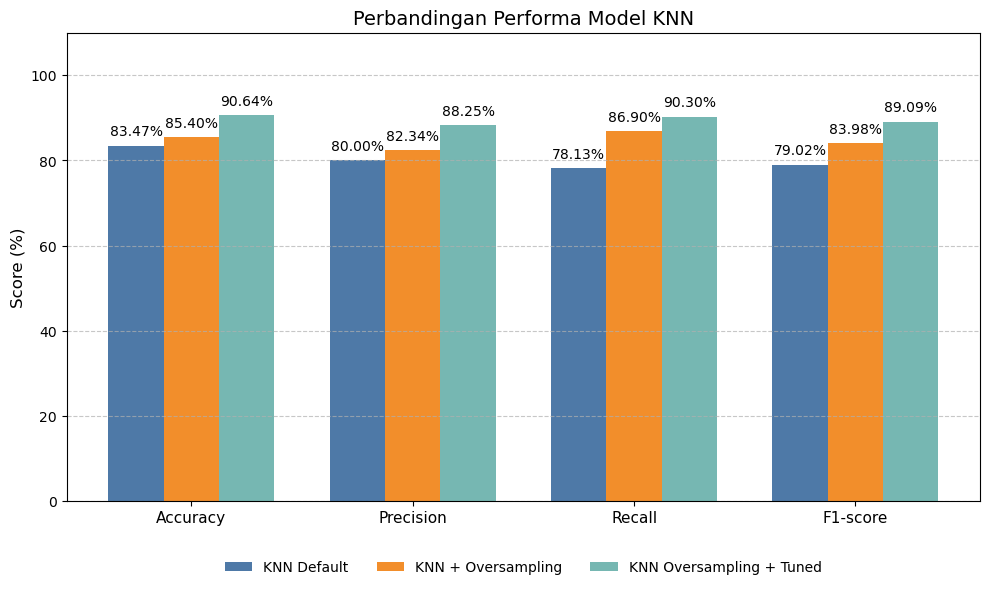

In [62]:
# Model KNN Default Parameters
metrics_default = [
    accuracy_score(y_test, y_predKNN),
    precision_score(y_test, y_predKNN, average='macro'),
    recall_score(y_test, y_predKNN, average='macro'),
    f1_score(y_test, y_predKNN, average='macro')
]

# Model KNN Oversampling
metrics_adasyn = [
    accuracy_score(y_test, y_predknn_adasyn),
    precision_score(y_test, y_predknn_adasyn, average='macro'),
    recall_score(y_test, y_predknn_adasyn, average='macro'),
    f1_score(y_test, y_predknn_adasyn, average='macro')
]

# Model KNN Oversampling dan Hyperparameter Tuning
metrics_best = [
    accuracy_score(y_test, y_predknn_pr1),
    precision_score(y_test, y_predknn_pr1, average='macro'),
    recall_score(y_test, y_predknn_pr1, average='macro'),
    f1_score(y_test, y_predknn_pr1, average='macro')
]

labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width, [m*100 for m in metrics_default], width, label='KNN Default', color='#4E79A7')
bars2 = ax.bar(x, [m*100 for m in metrics_adasyn], width, label='KNN + Oversampling', color='#F28E2B')
bars3 = ax.bar(x + width, [m*100 for m in metrics_best], width, label='KNN Oversampling + Tuned', color='#76B7B2')

# Tambahkan angka di atas batang dengan annotate
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10, color='black')

ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=11)
ax.set_ylabel("Score (%)", fontsize=12)
ax.set_title("Perbandingan Performa Model KNN", fontsize=14)
ax.set_ylim(0, 110)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False)
plt.tight_layout()
plt.show()

# save model CatBoost

In [40]:
import pickle

In [41]:
with open('modelCB_default.sav', 'wb') as file:
    pickle.dump(modeldefault_CB, file)

In [42]:
with open('modelCB_oversampling.sav', 'wb') as file:
    pickle.dump(modelcb_adasyn, file)

In [43]:
with open('modelCB_terbaik.sav', 'wb') as file:
    pickle.dump(modelcb_pr4, file)

# Save Model KNN

In [44]:
with open('modelKNN_default.sav', 'wb') as file:
    pickle.dump(modeldefault_KNN, file)

In [45]:
with open('modelKNN_oversampling.sav', 'wb') as file:
    pickle.dump(modelknn_adasyn, file)

In [46]:
with open('modelKNN_terbaik.sav', 'wb') as file:
    pickle.dump(modelknn_pr1, file)